<a href="https://colab.research.google.com/github/iborgstedt2848/ML_G84_G2_P2/blob/main/segunda_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Práctica

**Autores:**

---


Luis Enrique Valero Montero - Gr. 85 - 100495982

Isabelle Borgstedt - Gr. 84 - 100559990

# Scalers

Primero, vamos a visualizar los diferentes scalers: MinMaxScaler, StandardScaler, y RobustScaler usando gráficos que muestran los agrupamientos. Después, podemos elegir el mejor basado en las métricas y los gráficos.

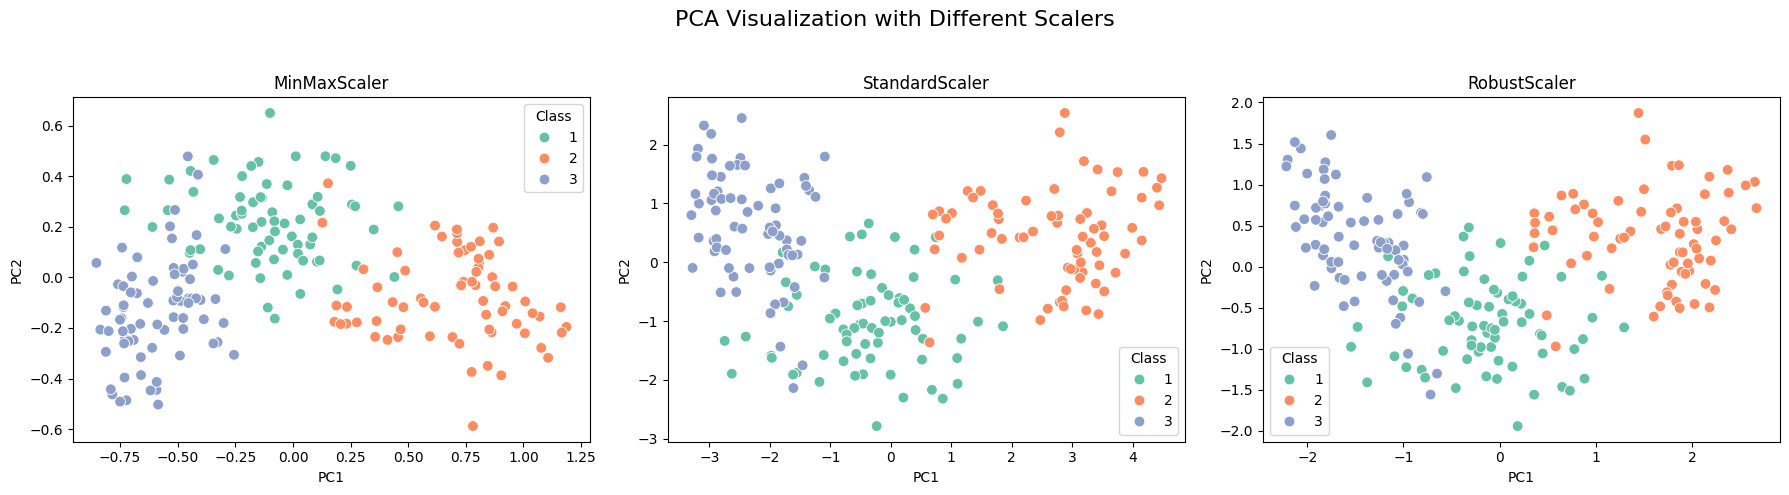

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# cargar los datos
df = pd.read_csv("semillas.csv")
X = df.drop(columns=['clase'])

# semilla para la reproducibilidad
random_seed = 559990

# dictionario de scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('PCA Visualization with Different Scalers', fontsize=16)

# probar cada scaler y realizar PCA
for ax, (name, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_pca = pipeline.fit_transform(X)
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['class'] = y

    sns.scatterplot(
        data=pca_df,
        x='PC1', y='PC2',
        hue='class',
        palette='Set2',
        ax=ax,
        s=60
    )

    ax.set_title(name)
    ax.legend().set_title('Class')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

También podemos calcular la efectivdad de cada scaler con las métricas Silhouette Score, Davies-Bounldin Index, y Calinski Harabasz score para obtener una respuesta más objetiva del rendimiento de los scalers.

In [3]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

results = []

for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_scaled_pca = pipeline.fit_transform(X)

    # correr kmeans con k=3
    kmeans = KMeans(n_clusters=3, random_state=random_seed)
    labels = kmeans.fit_predict(X_scaled_pca)

    # evaluar las métricas
    silhouette = silhouette_score(X_scaled_pca, labels)
    db_index = davies_bouldin_score(X_scaled_pca, labels)
    ch_index = calinski_harabasz_score(X_scaled_pca, labels)

    results.append({
        'Scaler': name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Index': ch_index
    })

# convertirse en df
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Silhouette Score', ascending=False))


           Scaler  Silhouette Score  Davies-Bouldin Index  \
0    MinMaxScaler          0.503160              0.697186   
1  StandardScaler          0.493430              0.706673   
2    RobustScaler          0.489777              0.699397   

   Calinski-Harabasz Index  
0               464.844797  
1               397.301078  
2               360.897259  


Silhouette Score:

Davies-Bouldin Index:

Calinski-Harabasz Index:

# K-Means

# Hierarchical Clustering/Dendrograms

# DBSCAN

# Análisis